<a href="https://colab.research.google.com/github/ClarisseAlvarenga/codenation_aceleradev_ds/blob/master/Desafio_Semana_7_Codenation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio 6

Neste desafio, vamos praticar _feature engineering_, um dos processos mais importantes e trabalhosos de ML. Utilizaremos o _data set_ [Countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world), que contém dados sobre os 227 países do mundo com informações sobre tamanho da população, área, imigração e setores de produção.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import sklearn as sk

In [ ]:
# Algumas configurações para o matplotlib.
#%matplotlib inline
#from IPython.core.pylabtools import figsize
#figsize(12, 8)
#sns.set()

In [ ]:
countries = pd.read_csv("countries.csv")

In [ ]:
new_column_names = [
    "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"
]

countries.columns = new_column_names

countries.head(5)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


## Observações

Esse _data set_ ainda precisa de alguns ajustes iniciais. Primeiro, note que as variáveis numéricas estão usando vírgula como separador decimal e estão codificadas como strings. Corrija isso antes de continuar: transforme essas variáveis em numéricas adequadamente.

Além disso, as variáveis `Country` e `Region` possuem espaços a mais no começo e no final da string. Você pode utilizar o método `str.strip()` para remover esses espaços.

## Inicia sua análise a partir daqui

# PRE TRATAMENTO DOS DADOS

In [ ]:
# Sua análise começa aqui.
#Como vamos trabalhar com feature engineering, vou gerar uma cópia do DF para trabalho.
paises = countries.copy()

In [ ]:
#Usando o str.strip() para remover os espaços em branco do início e do fim da coluna países
paises['Country'] = paises.Country.str.strip()

In [ ]:
#Usando o str.strip() para remover os espaços em branco do início e do fim da coluna Regiões
paises['Region'] = paises.Region.str.strip()

In [ ]:
paises.head()

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [ ]:
#conferindo se houve mudança após a alteração
print(countries.Region.equals(paises.Region))
#para comparar, vou buscar os dados únicos dos dois DFs
print(countries.Region.sort_values().unique())
print(paises.Region.sort_values().unique())

False
['ASIA (EX. NEAR EAST)         ' 'BALTICS                            '
 'C.W. OF IND. STATES ' 'EASTERN EUROPE                     '
 'LATIN AMER. & CARIB    ' 'NEAR EAST                          '
 'NORTHERN AFRICA                    '
 'NORTHERN AMERICA                   '
 'OCEANIA                            '
 'SUB-SAHARAN AFRICA                 '
 'WESTERN EUROPE                     ']
['ASIA (EX. NEAR EAST)' 'BALTICS' 'C.W. OF IND. STATES' 'EASTERN EUROPE'
 'LATIN AMER. & CARIB' 'NEAR EAST' 'NORTHERN AFRICA' 'NORTHERN AMERICA'
 'OCEANIA' 'SUB-SAHARAN AFRICA' 'WESTERN EUROPE']


In [ ]:
#fazendo a mesma coisa com os países
print(countries.Country.equals(paises.Region))
#para comparar, vou buscar os dados únicos dos dois DFs
print(countries.Country.sort_values().unique())
print(paises.Country.sort_values().unique())

False
['Afghanistan ' 'Albania ' 'Algeria ' 'American Samoa ' 'Andorra '
 'Angola ' 'Anguilla ' 'Antigua & Barbuda ' 'Argentina ' 'Armenia '
 'Aruba ' 'Australia ' 'Austria ' 'Azerbaijan ' 'Bahamas, The ' 'Bahrain '
 'Bangladesh ' 'Barbados ' 'Belarus ' 'Belgium ' 'Belize ' 'Benin '
 'Bermuda ' 'Bhutan ' 'Bolivia ' 'Bosnia & Herzegovina ' 'Botswana '
 'Brazil ' 'British Virgin Is. ' 'Brunei ' 'Bulgaria ' 'Burkina Faso '
 'Burma ' 'Burundi ' 'Cambodia ' 'Cameroon ' 'Canada ' 'Cape Verde '
 'Cayman Islands ' 'Central African Rep. ' 'Chad ' 'Chile ' 'China '
 'Colombia ' 'Comoros ' 'Congo, Dem. Rep. ' 'Congo, Repub. of the '
 'Cook Islands ' 'Costa Rica ' "Cote d'Ivoire " 'Croatia ' 'Cuba '
 'Cyprus ' 'Czech Republic ' 'Denmark ' 'Djibouti ' 'Dominica '
 'Dominican Republic ' 'East Timor ' 'Ecuador ' 'Egypt ' 'El Salvador '
 'Equatorial Guinea ' 'Eritrea ' 'Estonia ' 'Ethiopia ' 'Faroe Islands '
 'Fiji ' 'Finland ' 'France ' 'French Guiana ' 'French Polynesia '
 'Gabon ' 'Gambia, The ' 'G

In [ ]:
#conferindo os tipos de dados do dataset
paises.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           227 non-null    object 
 1   Region            227 non-null    object 
 2   Population        227 non-null    int64  
 3   Area              227 non-null    int64  
 4   Pop_density       227 non-null    object 
 5   Coastline_ratio   227 non-null    object 
 6   Net_migration     224 non-null    object 
 7   Infant_mortality  224 non-null    object 
 8   GDP               226 non-null    float64
 9   Literacy          209 non-null    object 
 10  Phones_per_1000   223 non-null    object 
 11  Arable            225 non-null    object 
 12  Crops             225 non-null    object 
 13  Other             225 non-null    object 
 14  Climate           205 non-null    object 
 15  Birthrate         224 non-null    object 
 16  Deathrate         223 non-null    object 
 1

In [ ]:
#primeira conversão: para String e trocando a vírgula por ponto, e convertendo para float
paises.Pop_density = paises.Pop_density.convert_dtypes().str.replace(',','.').astype(float)

In [ ]:
#visualizando as colunas
paises.columns

Index(['Country', 'Region', 'Population', 'Area', 'Pop_density',
       'Coastline_ratio', 'Net_migration', 'Infant_mortality', 'GDP',
       'Literacy', 'Phones_per_1000', 'Arable', 'Crops', 'Other', 'Climate',
       'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [ ]:
#criando as colunas que precisam ser transformadas em float
colunas_a_transformar = ['Coastline_ratio', 'Net_migration', 'Infant_mortality',
                         'Literacy', 'Phones_per_1000', 'Arable', 'Crops',
                         'Other','Birthrate', 'Climate', 'Deathrate', 'Agriculture',
                         'Industry', 'Service']

In [ ]:
#criando a função
def alterar_coluna(df, colunas):
  for coluna in colunas:
    df[coluna] = df[coluna].astype(str).str.replace(',','.').astype(float, errors='ignore')
  return df.head()

In [ ]:
alterar_coluna(paises,colunas_a_transformar)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [ ]:
paises.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           227 non-null    object 
 1   Region            227 non-null    object 
 2   Population        227 non-null    int64  
 3   Area              227 non-null    int64  
 4   Pop_density       227 non-null    float64
 5   Coastline_ratio   227 non-null    float64
 6   Net_migration     224 non-null    float64
 7   Infant_mortality  224 non-null    float64
 8   GDP               226 non-null    float64
 9   Literacy          209 non-null    float64
 10  Phones_per_1000   223 non-null    float64
 11  Arable            225 non-null    float64
 12  Crops             225 non-null    float64
 13  Other             225 non-null    float64
 14  Climate           205 non-null    float64
 15  Birthrate         224 non-null    float64
 16  Deathrate         223 non-null    float64
 1

In [ ]:
#conferindo dados nulos
paises.isna().sum()

Country              0
Region               0
Population           0
Area                 0
Pop_density          0
Coastline_ratio      0
Net_migration        3
Infant_mortality     3
GDP                  1
Literacy            18
Phones_per_1000      4
Arable               2
Crops                2
Other                2
Climate             22
Birthrate            3
Deathrate            4
Agriculture         15
Industry            16
Service             15
dtype: int64

# INÍCIO DO DESAFIO

## Questão 1

Quais são as regiões (variável `Region`) presentes no _data set_? Retorne uma lista com as regiões únicas do _data set_ com os espaços à frente e atrás da string removidos (mas mantenha pontuação: ponto, hífen etc) e ordenadas em ordem alfabética.

In [ ]:
#visualizando a Series
paises.Region.sort_values().unique()

array(['ASIA (EX. NEAR EAST)', 'BALTICS', 'C.W. OF IND. STATES',
       'EASTERN EUROPE', 'LATIN AMER. & CARIB', 'NEAR EAST',
       'NORTHERN AFRICA', 'NORTHERN AMERICA', 'OCEANIA',
       'SUB-SAHARAN AFRICA', 'WESTERN EUROPE'], dtype=object)

In [ ]:
def q1():
  return list(paises.Region.sort_values().unique())


In [ ]:
q1()

['ASIA (EX. NEAR EAST)',
 'BALTICS',
 'C.W. OF IND. STATES',
 'EASTERN EUROPE',
 'LATIN AMER. & CARIB',
 'NEAR EAST',
 'NORTHERN AFRICA',
 'NORTHERN AMERICA',
 'OCEANIA',
 'SUB-SAHARAN AFRICA',
 'WESTERN EUROPE']

## Questão 2

Discretizando a variável `Pop_density` em 10 intervalos com `KBinsDiscretizer`, seguindo o encode `ordinal` e estratégia `quantile`, quantos países se encontram acima do 90º percentil? Responda como um único escalar inteiro.

In [ ]:
#colocando o KBinsDiscretizer numa variável e ajustando os dados
from sklearn.preprocessing import KBinsDiscretizer
discret = KBinsDiscretizer(n_bins=10, encode= 'ordinal', strategy='quantile')
#criando uma coluna com os dados transformados
paises['Categoric_Pop_Density'] = discret.fit_transform(paises[['Pop_density']])

In [ ]:
paises['Categoric_Pop_Density']

0      3.0
1      6.0
2      1.0
3      8.0
4      7.0
      ... 
222    9.0
223    0.0
224    3.0
225    1.0
226    2.0
Name: Categoric_Pop_Density, Length: 227, dtype: float64

In [ ]:
#conferindo o percentil 90
percentil = np.percentile(paises['Categoric_Pop_Density'], 90)
#visualizando países que possuem dados acima do percentil
query = paises[paises['Categoric_Pop_Density'] > percentil]
#visualizando o resultado da query
query.head()

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Categoric_Pop_Density
15,Bahrain,NEAR EAST,698585,665,1050.5,24.21,1.05,17.27,16900.0,89.1,281.3,2.82,5.63,91.55,1.0,17.80,4.14,0.005,0.387,0.608,9.0
16,Bangladesh,ASIA (EX. NEAR EAST),147365352,144000,1023.4,0.40,-0.71,62.60,1900.0,43.1,7.3,62.11,3.07,34.82,2.0,29.80,8.27,0.199,0.198,0.603,9.0
17,Barbados,LATIN AMER. & CARIB,279912,431,649.5,22.51,-0.31,12.50,15700.0,97.4,481.9,37.21,2.33,60.46,2.0,12.71,8.67,0.060,0.160,0.780,9.0
22,Bermuda,NORTHERN AMERICA,65773,53,1241.0,194.34,2.49,8.53,36000.0,98.0,851.4,20.00,0.00,80.00,2.0,11.40,7.74,0.010,0.100,0.890,9.0
74,Gaza Strip,NEAR EAST,1428757,360,3968.8,11.11,1.60,22.93,600.0,NaN,244.3,28.95,21.05,50.00,3.0,39.45,3.80,0.030,0.283,0.687,9.0


In [ ]:
#somando os países únicos
query.Country.nunique()

23

In [ ]:
def q2():
    return int(query.Country.nunique())

In [ ]:
q2()

23

# Questão 3

Se codificarmos as variáveis `Region` e `Climate` usando _one-hot encoding_, quantos novos atributos seriam criados? Responda como um único escalar.

In [ ]:
#vendo os valores únicos nas colunas de Region e Climate
print(paises.Region.unique())
print(paises.Climate.unique())
print(len(paises.Climate.unique()))

['ASIA (EX. NEAR EAST)' 'EASTERN EUROPE' 'NORTHERN AFRICA' 'OCEANIA'
 'WESTERN EUROPE' 'SUB-SAHARAN AFRICA' 'LATIN AMER. & CARIB'
 'C.W. OF IND. STATES' 'NEAR EAST' 'NORTHERN AMERICA' 'BALTICS']
[1.  3.  2.  nan 4.  1.5 2.5]
7


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
#ajustando nos dados de Region
encoder = OneHotEncoder(sparse=False, dtype=np.int)
region = encoder.fit_transform(paises[["Region"]])
_,cat_region = region.shape
cat_region

11

In [ ]:
#conferindo com o nunique()
cat_paises = paises.Region.nunique()
cat_paises

11

In [ ]:
#usando o len para pegar o missing
cat_clima= len(paises.Climate.unique())
cat_clima

7

In [ ]:
#como ele vai criar um atributo para cada valor único, podemos usar o tamanho do array de valores únicos para somar as categorias que seriam criadas
def q3():
  return int(cat_paises + cat_clima)


In [ ]:
q3()

18

## Questão 4

Aplique o seguinte _pipeline_:

1. Preencha as variáveis do tipo `int64` e `float64` com suas respectivas medianas.
2. Padronize essas variáveis.

Após aplicado o _pipeline_ descrito acima aos dados (somente nas variáveis dos tipos especificados), aplique o mesmo _pipeline_ (ou `ColumnTransformer`) ao dado abaixo. Qual o valor da variável `Arable` após o _pipeline_? Responda como um único float arredondado para três casas decimais.

In [ ]:
test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]

In [ ]:
#gerando um df só com as variáveis originais
dados = paises[countries.columns]
dados.head()

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [ ]:
#importando a biblioteca
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
#criando o pipeline
pipeline = Pipeline(steps=[
    ("imputa", SimpleImputer(strategy="median")), #substituir os dados faltantes pela mediana
    ("padroniza", StandardScaler()), #padronizando os dados com o StandardScaler
])

In [ ]:
#separando o dataframe em dois por tipo de dados, usando o select_dtypes
paises_numerico = dados.select_dtypes(include=['float64','int64']) #incluindo os dados numéricos
paises_categorico = dados.select_dtypes(exclude=['float64','int64']) #excluindo os dados numéricos
paises_numerico.head()

,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [ ]:
#fazendo o ajuste dos dados no pipeline
pipeline.fit_transform(paises_numerico)

array([[ 0.01969468,  0.02758332, -0.19984434, ...,  1.63657562,
        -0.31540576, -1.1611354 ],
       [-0.21387688, -0.31879748, -0.15360296, ...,  0.59516349,
        -0.70631815,  0.08342432],
       [ 0.03561811,  0.99842051, -0.22048996, ..., -0.32662697,
         2.39091078, -1.67396905],
       ...,
       [-0.06192308, -0.03933023, -0.20431152, ..., -0.08738364,
         1.4286649 , -1.0798325 ],
       [-0.14654488,  0.08642673, -0.21958445, ...,  0.51072467,
         0.06047154, -0.47944188],
       [-0.14029829, -0.11624192, -0.20992568, ...,  0.22222537,
        -0.29285312,  0.08342432]])

In [ ]:
#aplicando os dados ao teste (a lista test-country)
teste = np.array(test_country[2:]).reshape(1,-1)
resultado = pipeline.transform(teste)


In [ ]:
#criando um df com as colunas e os resultados
teste_DF = pd.DataFrame(resultado, columns=paises_numerico.columns)
teste_DF

,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,-0.244325,-0.334891,-0.228847,-0.29726,0.019591,-1.028617,-0.966233,-4.354272,-1.03721,-1.046857,-0.550581,-5.101122,-1.218122,-2.024552,-1.990921,-7.04915,-0.139155,0.034903


In [ ]:
#buscando o dado solicitado
teste_DF.Arable.values[0].round(3)

-1.047

In [ ]:
def q4():
    return float(teste_DF.Arable.values[0].round(3))

In [ ]:
q4()

-1.047

## Questão 5

Descubra o número de _outliers_ da variável `Net_migration` segundo o método do _boxplot_, ou seja, usando a lógica:

$$x \notin [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] \Rightarrow x \text{ é outlier}$$

que se encontram no grupo inferior e no grupo superior.

Você deveria remover da análise as observações consideradas _outliers_ segundo esse método? Responda como uma tupla de três elementos `(outliers_abaixo, outliers_acima, removeria?)` ((int, int, bool)).

In [ ]:
#visualizando os dados via describe
net = paises.Net_migration
net.describe()

count    224.000000
mean       0.038125
std        4.889269
min      -20.990000
25%       -0.927500
50%        0.000000
75%        0.997500
max       23.060000
Name: Net_migration, dtype: float64

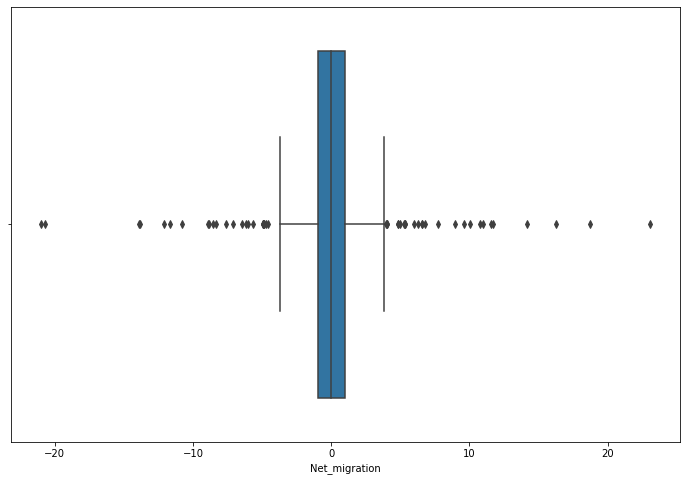

In [ ]:
#visualizando os dados num boxplot
plt.figure(figsize=(12,8))
ax = sns.boxplot(net)


In [ ]:
#criando as variáveis
quartil_1 = net.quantile(0.25)
quartil_3 = net.quantile(0.75)
IQR = quartil_3 - quartil_1 #também conhecido como intervalo inter quartil
#calculando o intervalo inter whiskers
int_inf = (quartil_1 - (1.5*IQR))
int_sup = (quartil_3 + (1.5*IQR))
intervalo = [int_inf, int_sup]


In [ ]:
#visualizando o intervalo
intervalo

[-3.8149999999999995, 3.885]

In [ ]:
#calculando outliers
outliers= net[(net < intervalo[0]) | (net > intervalo[1])]
len(outliers)


50

In [ ]:
#vendo quantidade de outliers abaixo e acima
outliers_abaixo = net[(net < intervalo[0])]
outliers_acima = net[(net > intervalo[1])]
len(outliers_abaixo), len(outliers_acima)

(24, 26)

In [ ]:
#percentual de outliers
dados_perdidos = (len(outliers)/paises.shape[0])
dados_perdidos

0.22026431718061673

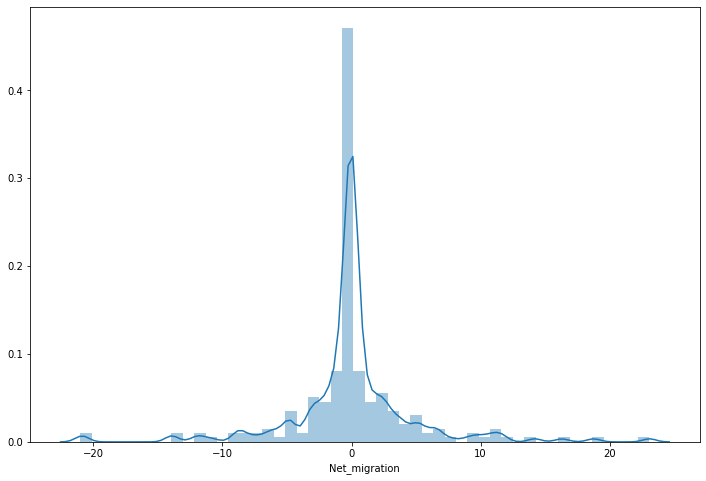

In [ ]:
#visualizando todos os dados da variável num distplot, para ver se o intervalo dado pelo cálculo faz sentido
plt.figure(figsize=(12,8))
sns.distplot(paises.Net_migration)

In [ ]:
#conferindo o percentual dos países que perderíamos se retirassemos os "outliers"
print (f'Se retirássemos os outliers perderíamos {round(dados_perdidos*100,2)}% dos dados')

Se retirássemos os outliers perderíamos 22.03% dos dados


Um outro jeito de procurar por _outliers_ é ver quem se encontra fora do intervalo $[\bar{x} - k * \sigma, \bar{x} + k * \sigma]$, onde o $k$ é a quantidade de desvios padrão (geralmente usamos 1.5, 2.0, 2.5 ou até 3.0), o $\bar{x}$ é a média dos dados e o $\sigma$ é o desvio padrão. 

Usaremos o $k= 2$ pq fica próximo dos 95% dos dados numa distribuição normal

In [ ]:
#usando uma outra métrica para conferir se os dados são efetivamente outliers, incluindo 2 desvios padrão
net_media = net.mean()
net_std = net.std()
net_media,net_std

(0.038125, 4.889269211168734)

In [ ]:
intervalo_2 = [net_media - 2 * net_std, net_media+ 2 * net_std]
#visualizando os dois intervalos
intervalo, intervalo_2

([-3.8149999999999995, 3.885], [-9.740413422337467, 9.816663422337468])

**CONCLUSÃO: Se excluirmos os outliers pelo método do boxplot perdemos uma quantidade considerável de dados, prejudicando a análise**

In [ ]:
#defini o limite de dados perdidos em 5% para retornar o booleano
def q5():
  return tuple((len(outliers_abaixo), len(outliers_acima), dados_perdidos <= 0.05))


In [ ]:
q5()

(24, 26, False)

## Questão 6
Para as questões 6 e 7 utilize a biblioteca `fetch_20newsgroups` de datasets de test do `sklearn`

Considere carregar as seguintes categorias e o dataset `newsgroups`:

```
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
```


Aplique `CountVectorizer` ao _data set_ `newsgroups` e descubra o número de vezes que a palavra _phone_ aparece no corpus. Responda como um único escalar.

In [ ]:
#importando as bibliotecas
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#carregando as categorias e o dataset (que não é um df padrão do Pandas)
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)

In [ ]:
#conferindo o tipo da variável newsgroup
type(newsgroup)

sklearn.utils.Bunch

In [ ]:
#criando o contador, ajustando e transformando os dados
contador = CountVectorizer()
contador_news = contador.fit_transform(newsgroup.data)
#criando a palavra alvo
alvo = u'phone' #o u indica que a string está em unicode

In [ ]:
#visualizando o tipo de variável que o fit devolve
type(contador_news)

scipy.sparse.csr.csr_matrix

In [ ]:
#buscando no vocabulário do CountVectorizer a palavra phone em lowercase a partir da palavra alvo em unicode 
phone = contador.vocabulary_.get(f"{alvo.lower()}")

In [ ]:
#somando as ocorrências
contador_news[:,phone].sum()

213

In [ ]:
def q6():
    return int(contador_news[:,phone].sum())

In [ ]:
q6()

213

## Questão 7

Aplique `TfidfVectorizer` ao _data set_ `newsgroups` e descubra o TF-IDF da palavra _phone_. Responda como um único escalar arredondado para três casas decimais.

In [ ]:
#Obtendo a matriz de dados usando o TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#aplicando  e ajustando aos dados
tfidf = TfidfVectorizer()
newsgroup_tfidf = tfidf.fit_transform(newsgroup.data)
type(newsgroup_tfidf)

scipy.sparse.csr.csr_matrix

In [ ]:
#buscando por phone (meu alvo criado na questão anterior) usando o método get_feature_names() do vetorizador
palavra = tfidf.get_feature_names().index(alvo)
palavra

19211

In [ ]:
#aplicando o mesmo método do CountVectorizer para buscar a relevância da palavra phone
tf_idf_phone = round(newsgroup_tfidf[:,palavra].sum(), 3)
tf_idf_phone

8.888

In [ ]:
def q7():
  return float(tf_idf_phone)
